In [1]:
import esm
import torch
import matplotlib.pyplot as plt


In [2]:
esm_transformer, esm2_alphabet = esm.pretrained.esm2_t36_3B_UR50D()
batch_converter = esm2_alphabet.get_batch_converter()


Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm2_t36_3B_UR50D.pt" to /Users/garyk/.cache/torch/hub/checkpoints/esm2_t36_3B_UR50D.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm2_t36_3B_UR50D-contact-regression.pt" to /Users/garyk/.cache/torch/hub/checkpoints/esm2_t36_3B_UR50D-contact-regression.pt


In [4]:
# Example

seq1 = 'MEPSLLSLFVLGVVALTETRAGSHSLRYFDTAMSRPELGDSQFISVGYVDDQQFVRFDSSSESPRMEPRAAWMDKVDQEDPNYWEGQTQISRSNAQITRVGLETIRGYYNQSRGGLHTYQTMIGCEVHPDGSFRKGFWQHAYDGHDYIALDRETLTWTAADPGAENTKRKWEAERSIAERYKAYLEEECVQWLKKYLQMGKDVLLRTEPSSARVSRHSGPDGEVSLRCRAQGFYPAEISLTWLRDGEEQLQDTEFIETRPGGDGTFQKWAAVAMAPGQEDRYSCRVQHEALAQPLSLRWEPEASSLWVIVGVTAGVLVLVTAVVAGAVILRRRNSGGKGGAYVPGAA'
seq = seq1 + 'GSGSGSGSGSGSGSGS'
seq_tuple = [(1, seq)]
batch_labels, batch_strs, batch_tokens = batch_converter(seq_tuple)

with torch.no_grad():
    outputs = esm_transformer(batch_tokens, gap_info_list = [], repr_layers=[36])
    
layer = outputs['representations'][36]

In [4]:
# # Changing the gap size

# def modify_gap (esm_model, distance):
#     esm_model.gap_distance = distance
#     for layer in esm_transformer.layers:
#         layer.gap_distance = distance
#         layer.self_attn.gap_distance = distance
#         layer.self_attn.rot_emb.gap_distance = distance
    
#     return esm_model


In [5]:
# Comparison of contacts. Note that the contact prediction is not retrained for working with the gap distance!!!

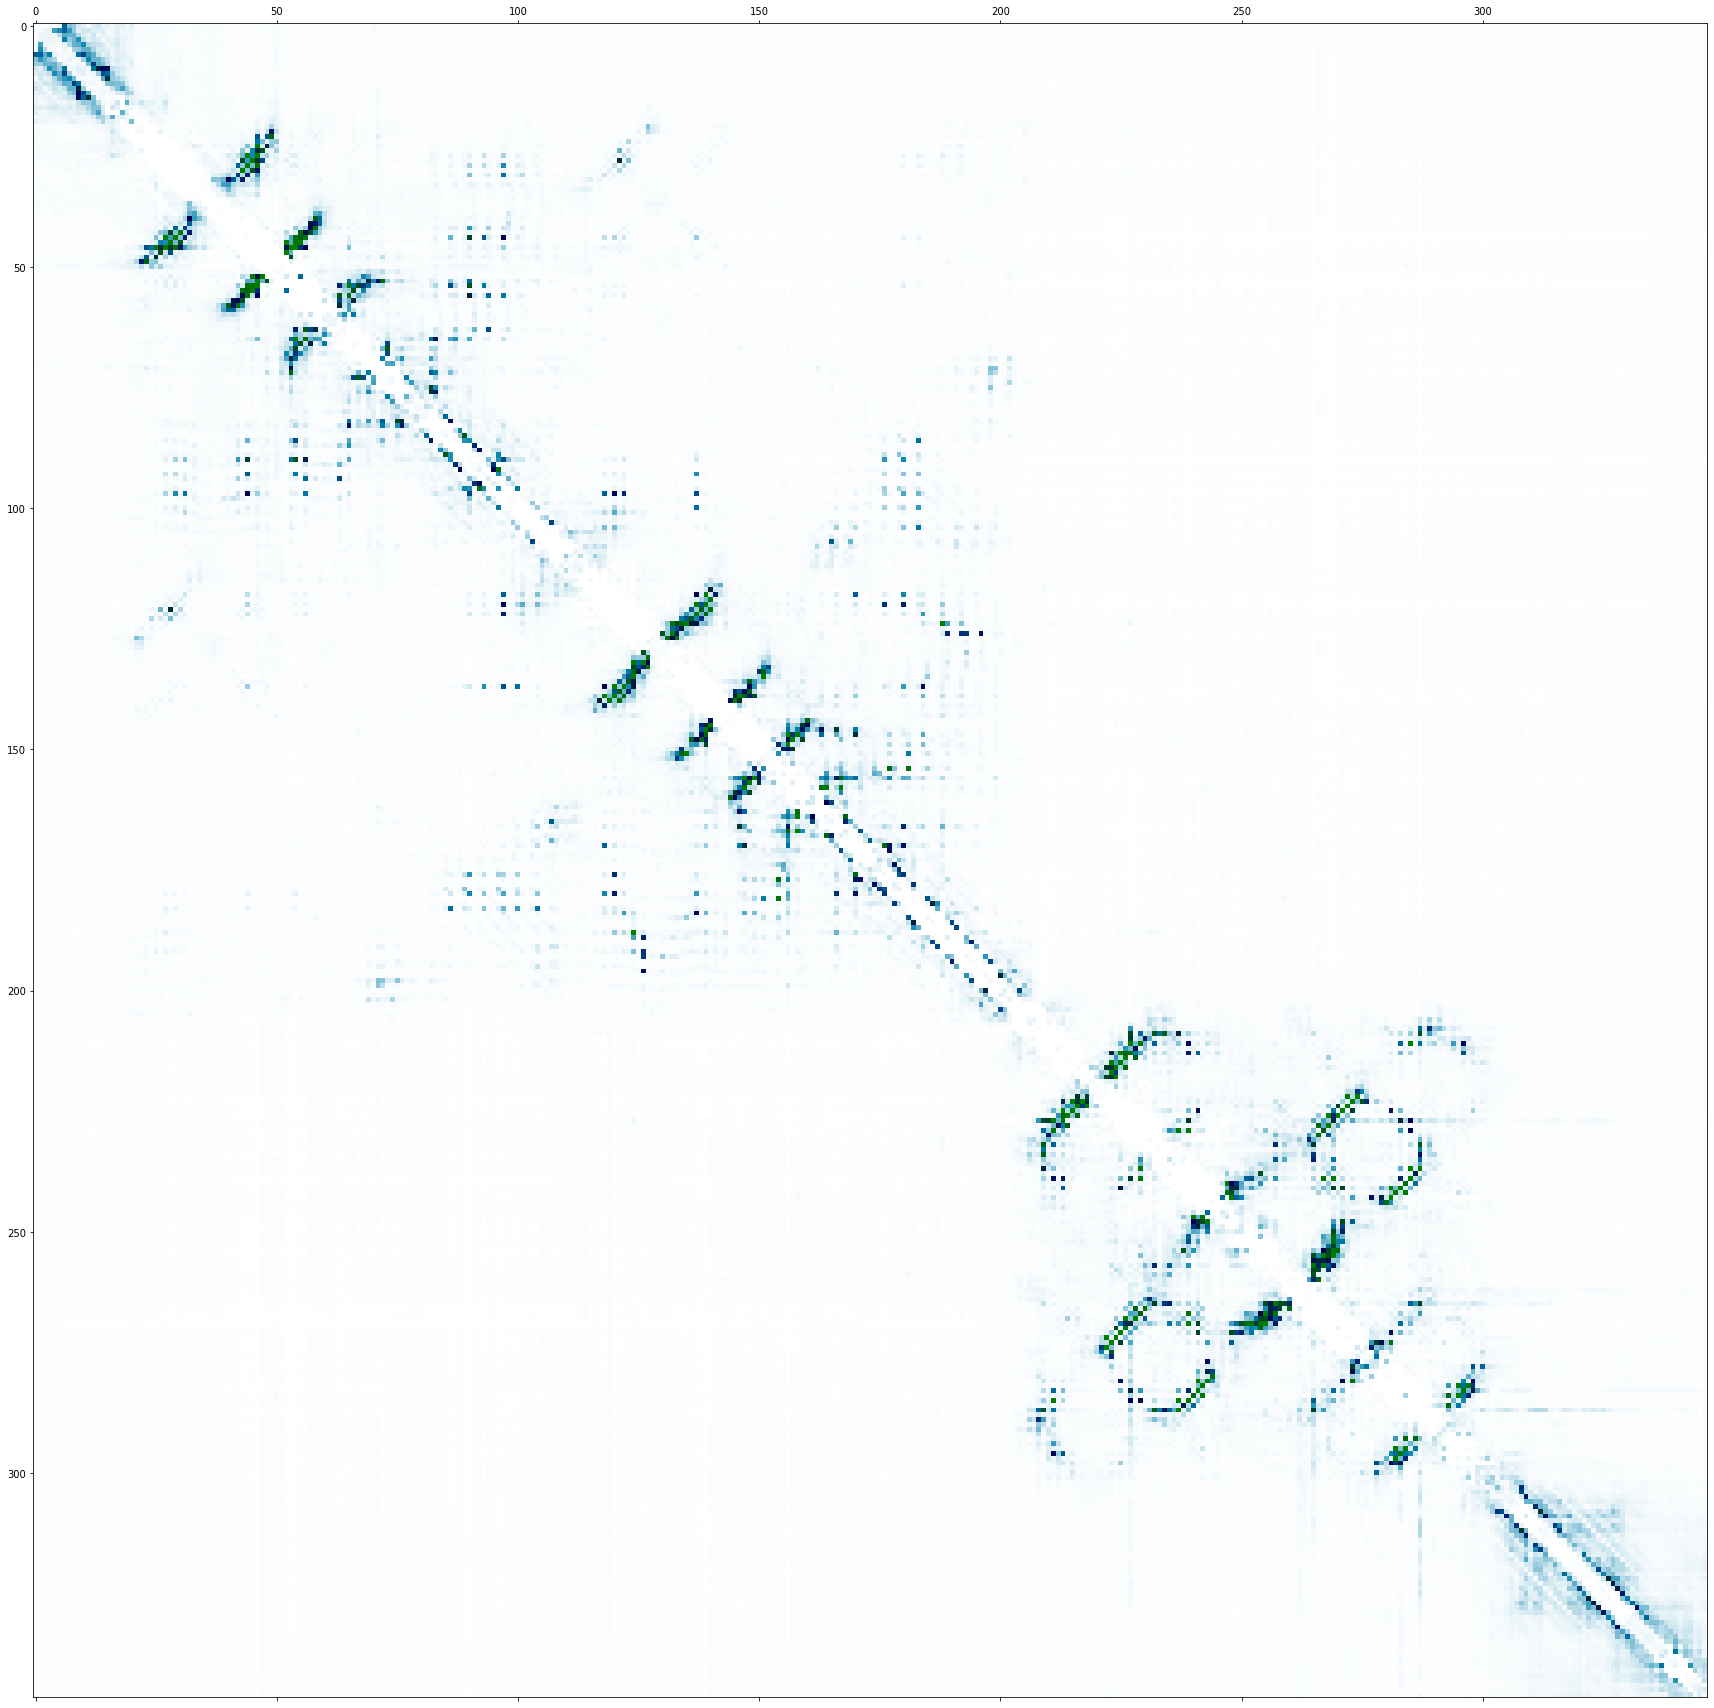

In [5]:
# One protein

seq = 'MEPSLLSLFVLGVVALTETRAGSHSLRYFDTAMSRPELGDSQFISVGYVDDQQFVRFDSSSESPRMEPRAAWMDKVDQEDPNYWEGQTQISRSNAQITRVGLETIRGYYNQSRGGLHTYQTMIGCEVHPDGSFRKGFWQHAYDGHDYIALDRETLTWTAADPGAENTKRKWEAERSIAERYKAYLEEECVQWLKKYLQMGKDVLLRTEPSSARVSRHSGPDGEVSLRCRAQGFYPAEISLTWLRDGEEQLQDTEFIETRPGGDGTFQKWAAVAMAPGQEDRYSCRVQHEALAQPLSLRWEPEASSLWVIVGVTAGVLVLVTAVVAGAVILRRRNSGGKGGAYVPGAA'

seq_tuple = [(1, seq)]
batch_labels, batch_strs, batch_tokens = batch_converter(seq_tuple)

with torch.no_grad():
    esm2_predictions = esm_transformer.predict_contacts(batch_tokens)[0].cpu()

plt.figure(figsize=(30,30))
plt.matshow(esm2_predictions.numpy(),fignum=1,cmap='ocean_r')
plt.show()

In [12]:
batch_tokens

tensor([[ 0, 20,  9, 14,  8,  4,  4,  8,  4, 18,  7,  4,  6,  7,  7,  5,  4, 11,
          9, 11, 10,  5,  6,  8, 21,  8,  4, 10, 19, 18, 13, 11,  5, 20,  8, 10,
         14,  9,  4,  6, 13,  8, 16, 18, 12,  8,  7,  6, 19,  7, 13, 13, 16, 16,
         18,  7, 10, 18, 13,  8,  8,  8,  9,  8, 14, 10, 20,  9, 14, 10,  5,  5,
         22, 20, 13, 15,  7, 13, 16,  9, 13, 14, 17, 19, 22,  9,  6, 16, 11, 16,
         12,  8, 10,  8, 17,  5, 16, 12, 11, 10,  7,  6,  4,  9, 11, 12, 10,  6,
         19, 19, 17, 16,  8, 10,  6,  6,  4, 21, 11, 19, 16, 11, 20, 12,  6, 23,
          9,  7, 21, 14, 13,  6,  8, 18, 10, 15,  6, 18, 22, 16, 21,  5, 19, 13,
          6, 21, 13, 19, 12,  5,  0, 13, 10,  9, 11,  4, 11, 22, 11,  5,  5, 13,
         14,  6,  5,  9, 17, 11, 15, 10, 15, 22,  9,  5,  9, 10,  8, 12,  5,  9,
         10, 19, 15,  5, 19,  4,  9,  9,  9, 23,  7, 16, 22,  4, 15, 15, 19,  4,
         16, 20,  6, 15, 13,  7,  4,  4, 10, 11,  9, 14,  8,  8,  5, 10,  7,  8,
         10, 21,  8,  6, 14,

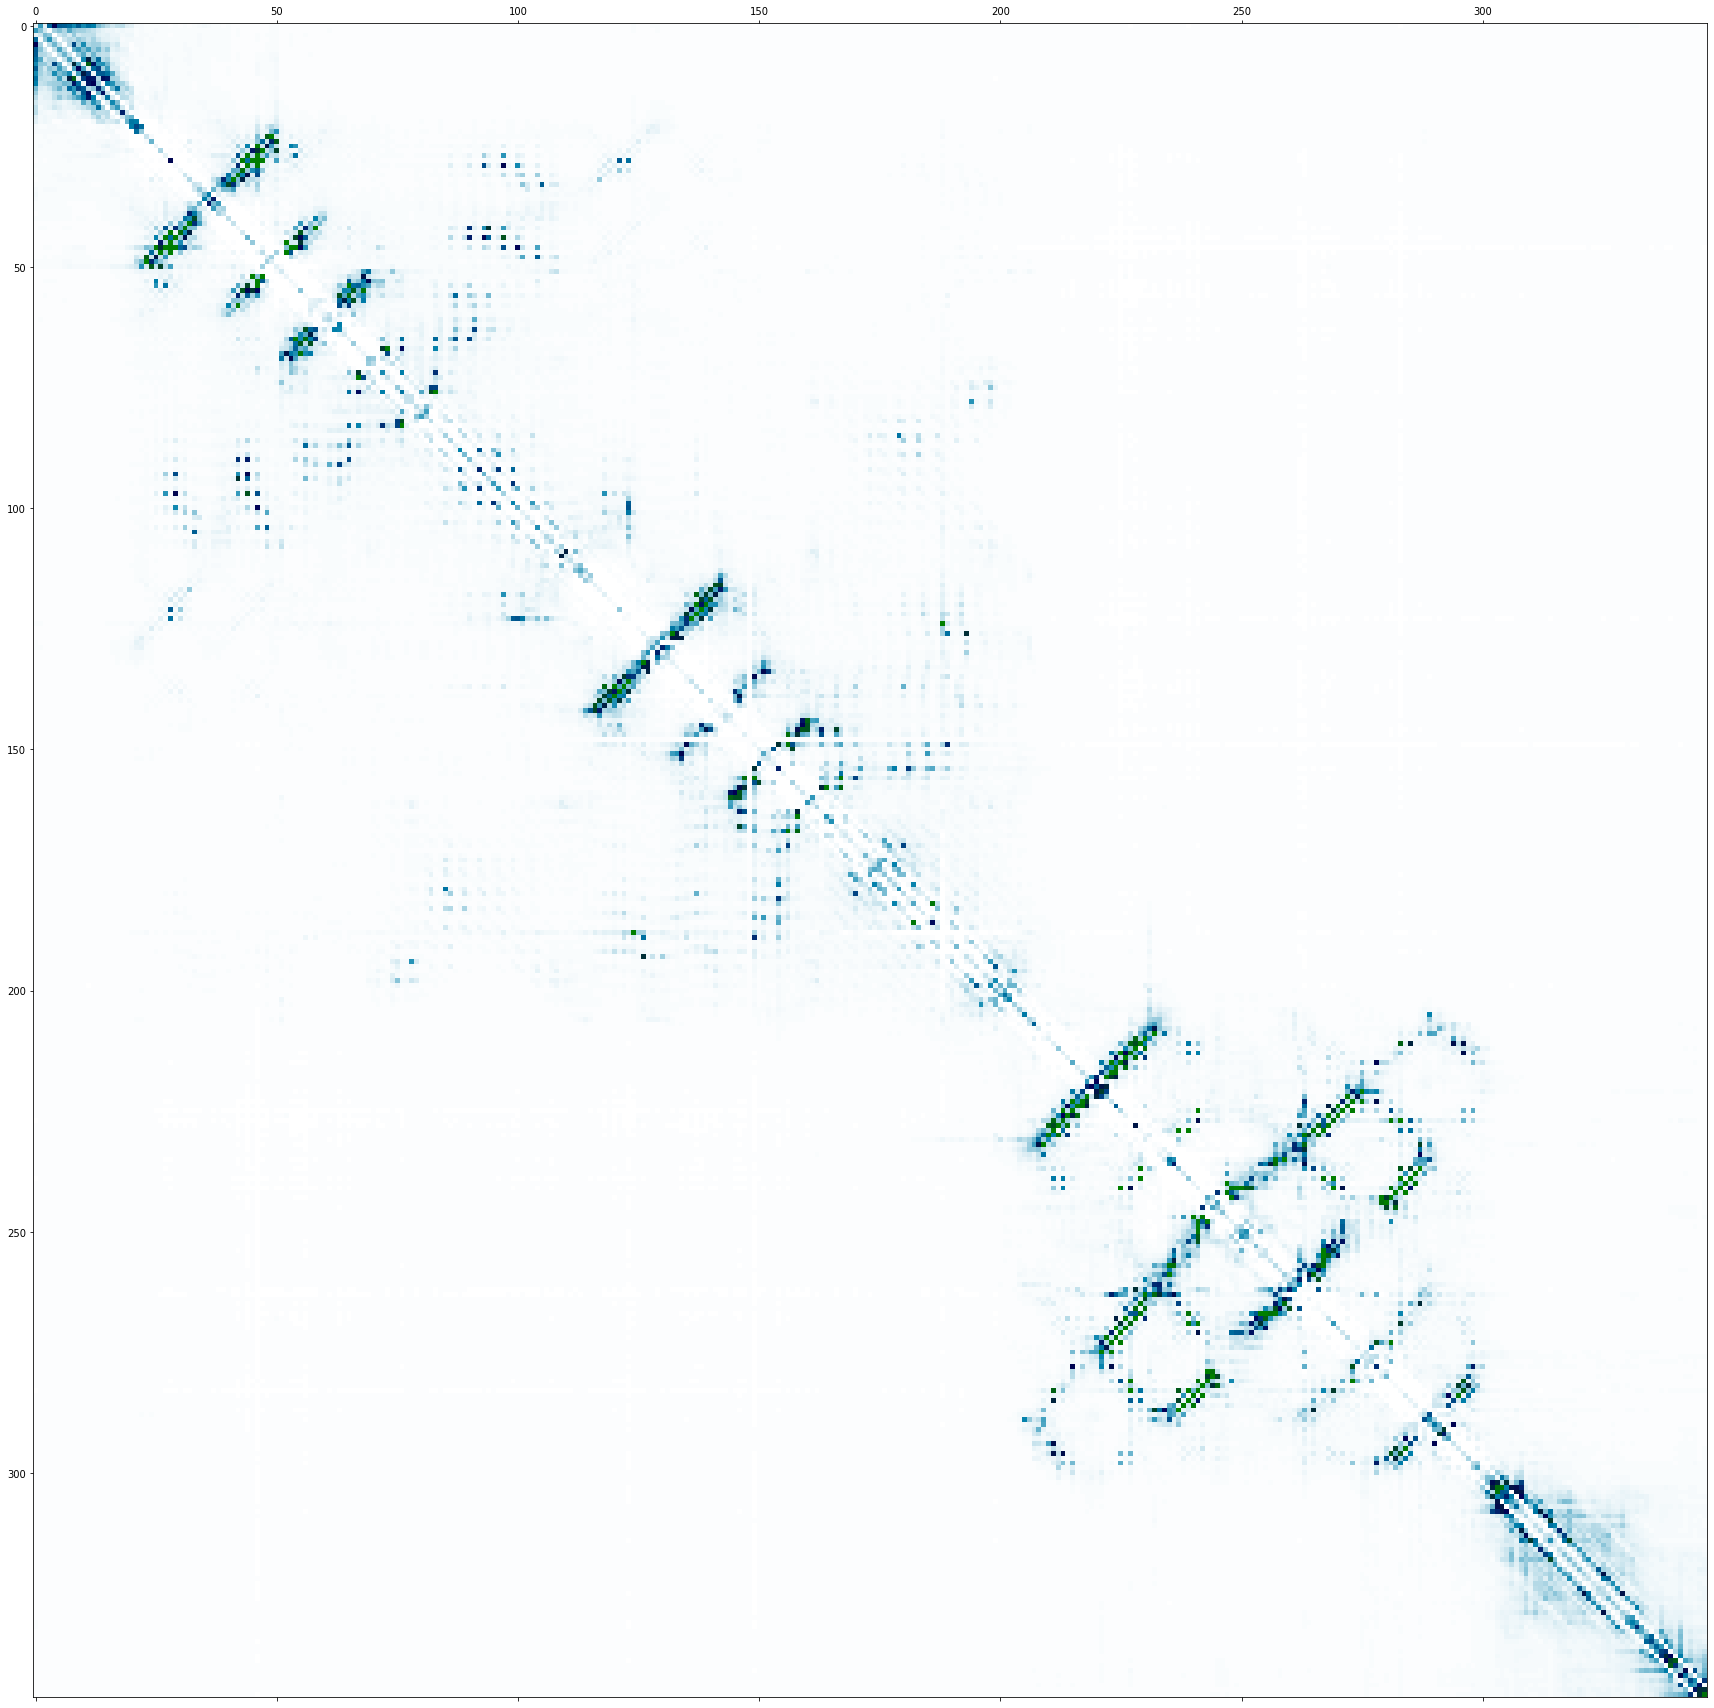

In [13]:
# protein with start and stop token

seq = 'MEPSLLSLFVLGVVALTETRAGSHSLRYFDTAMSRPELGDSQFISVGYVDDQQFVRFDSSSESPRMEPRAAWMDKVDQEDPNYWEGQTQISRSNAQITRVGLETIRGYYNQSRGGLHTYQTMIGCEVHPDGSFRKGFWQHAYDGHDYIALDRETLTWTAADPGAENTKRKWEAERSIAERYKAYLEEECVQWLKKYLQMGKDVLLRTEPSSARVSRHSGPDGEVSLRCRAQGFYPAEISLTWLRDGEEQLQDTEFIETRPGGDGTFQKWAAVAMAPGQEDRYSCRVQHEALAQPLSLRWEPEASSLWVIVGVTAGVLVLVTAVVAGAVILRRRNSGGKGGAYVPGAA'

seq_tuple = [(1, seq)]
batch_labels, batch_strs, batch_tokens = batch_converter(seq_tuple)

batch_tokens[0,149]=2
batch_tokens[0,150]=0

with torch.no_grad():
    esm2_predictions = esm_transformer.predict_contacts(batch_tokens)[0].cpu()

plt.figure(figsize=(30,30))
plt.matshow(esm2_predictions.numpy(),fignum=1,cmap='ocean_r')
plt.show()

In [10]:
batch_tokens.size()

torch.Size([1, 365])

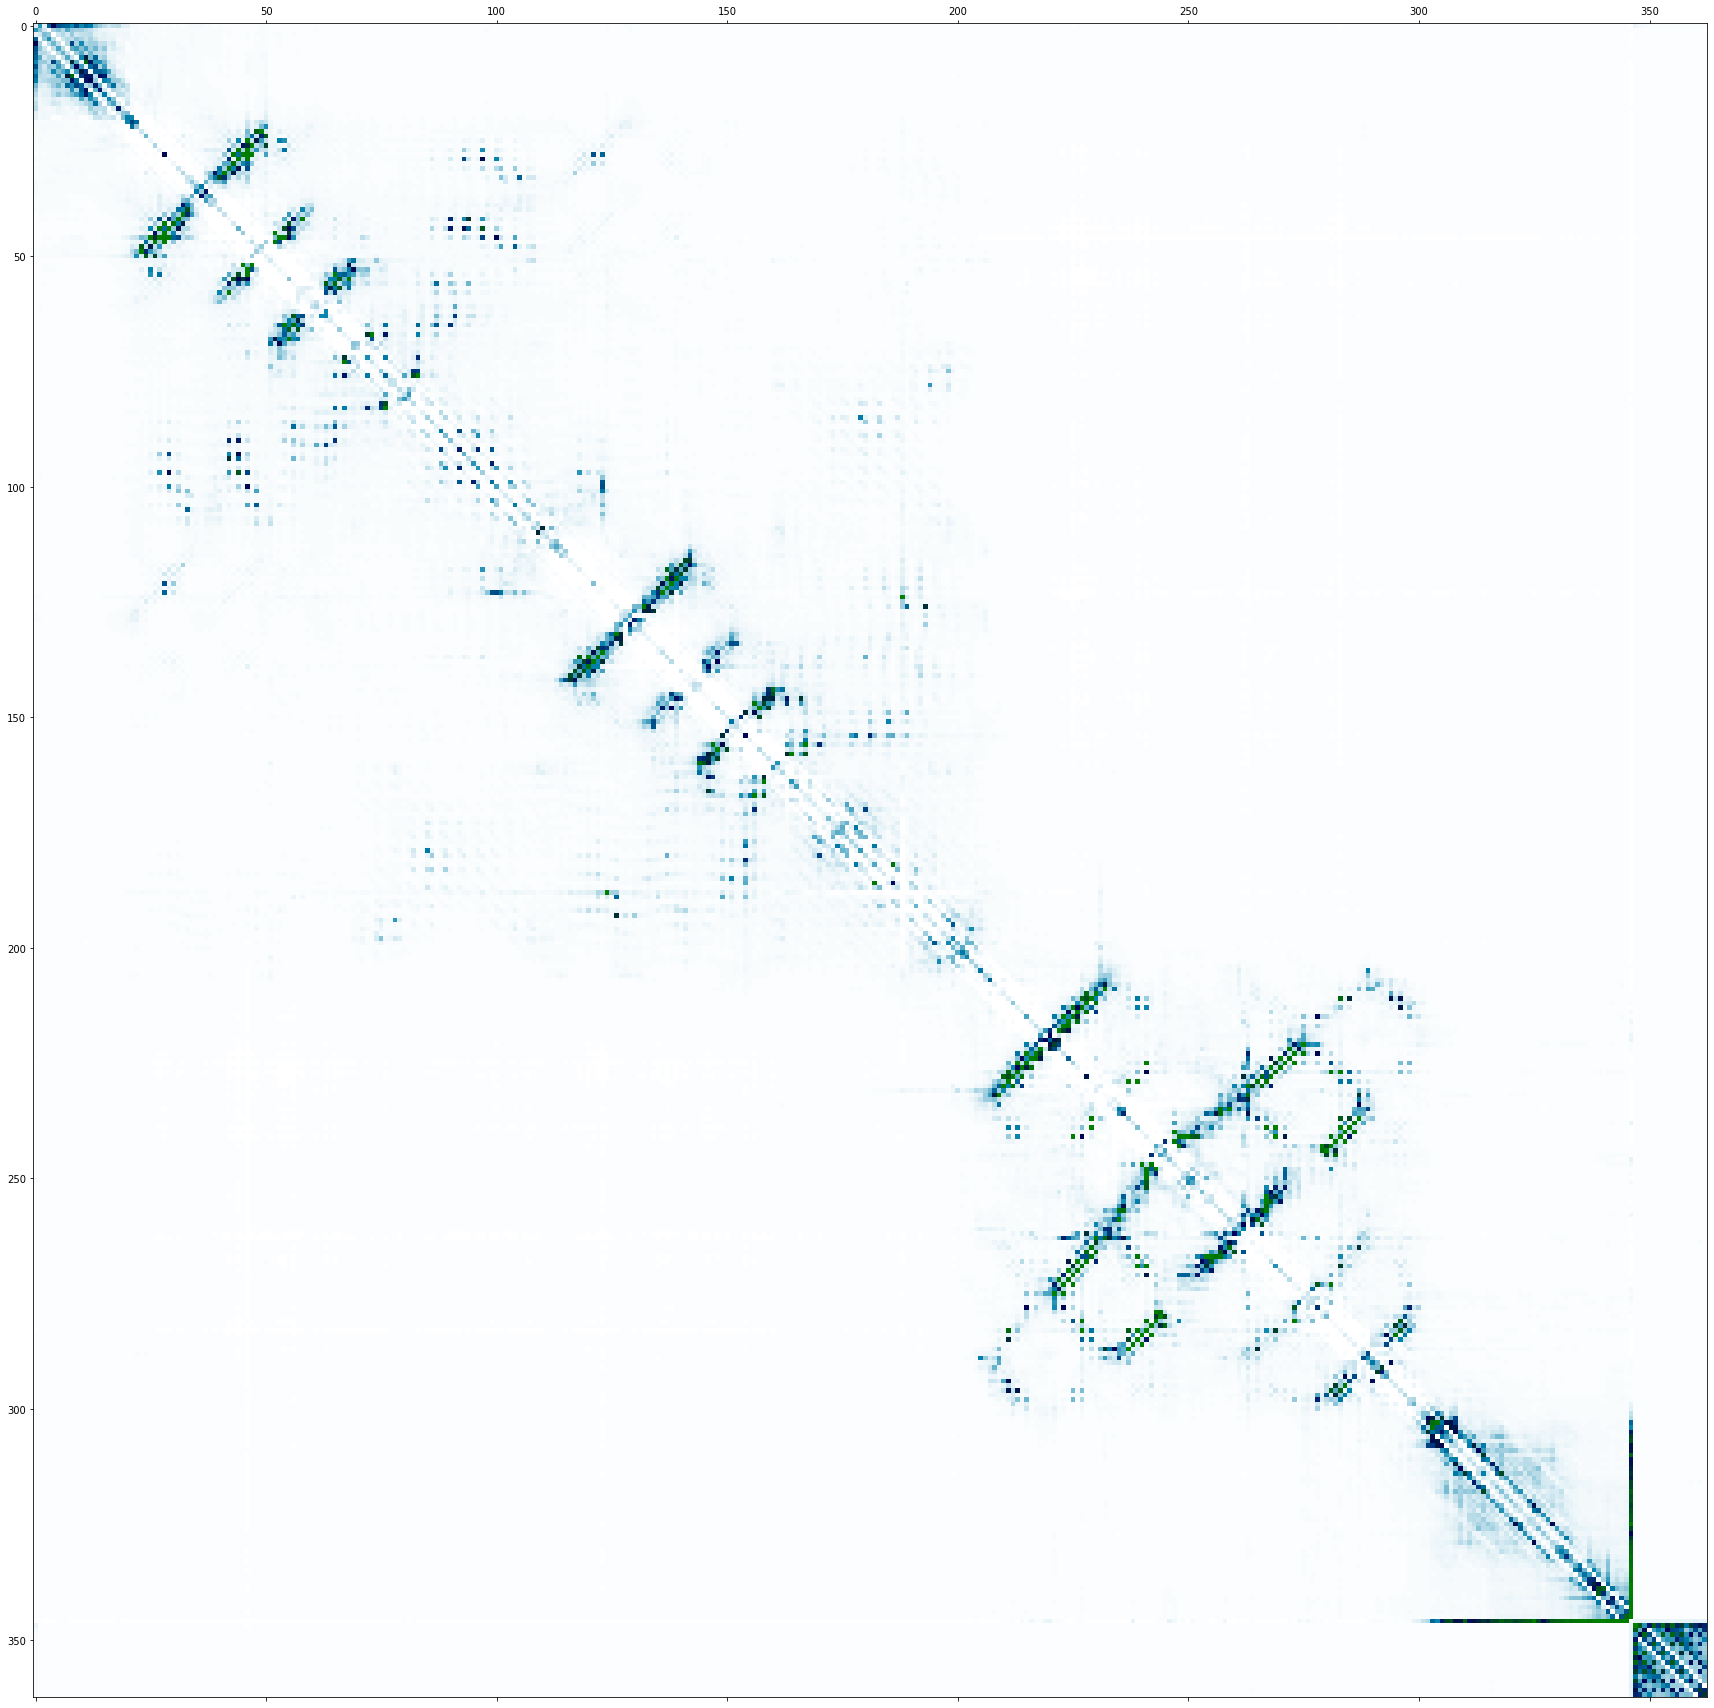

In [24]:
# 'Two' proteins with offset

seq1 = 'MEPSLLSLFVLGVVALTETRAGSHSLRYFDTAMSRPELGDSQFISVGYVDDQQFVRFDSSSESPRMEPRAAWMDKVDQEDPNYWEGQTQISRSNAQITRVGLETIRGYYNQSRGGLHTYQTMIGCEVHPDGSFRKGFWQHAYDGHDYIALDRETLTWTAADPGAENTKRKWEAERSIAERYKAYLEEECVQWLKKYLQMGKDVLLRTEPSSARVSRHSGPDGEVSLRCRAQGFYPAEISLTWLRDGEEQLQDTEFIETRPGGDGTFQKWAAVAMAPGQEDRYSCRVQHEALAQPLSLRWEPEASSLWVIVGVTAGVLVLVTAVVAGAVILRRRNSGGKGGAYVPGAA'
seq = seq1 + 'GSGSGSGSGSGSGSGS'
seq_tuple = [(1, seq)]
batch_labels, batch_strs, batch_tokens = batch_converter(seq_tuple)

with torch.no_grad():
    esm2_predictions_gap = esm_transformer.predict_contacts(batch_tokens, gap_info_list = [[len(seq1), 200]])[0].cpu()

plt.figure(figsize=(30,30))
plt.matshow(esm2_predictions_gap.numpy(),fignum=1,cmap='ocean_r')
plt.show()

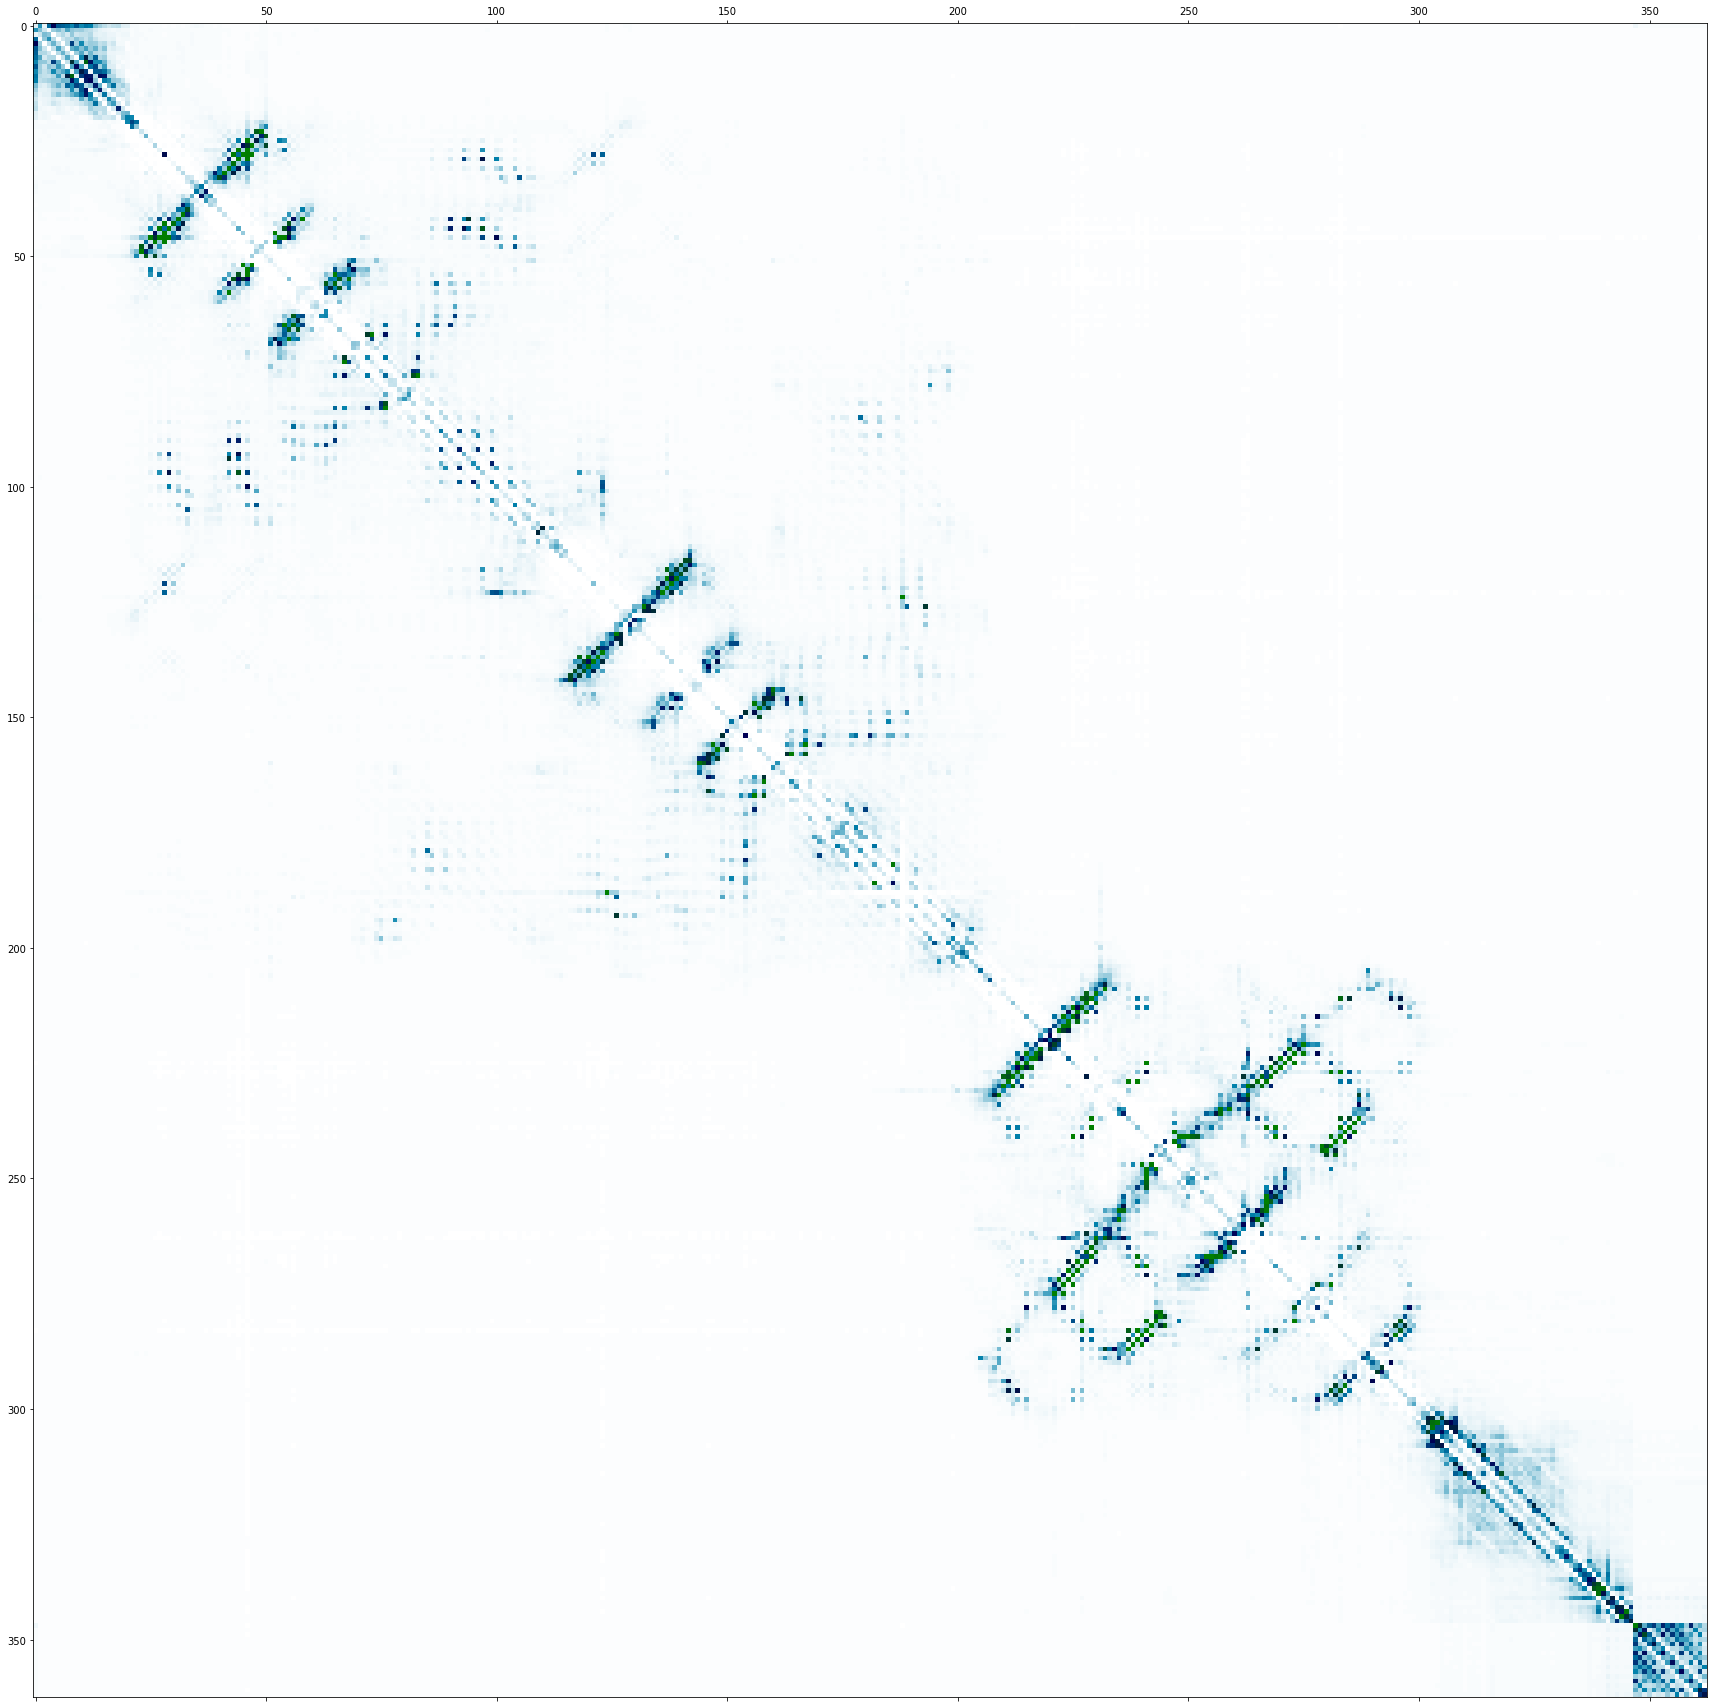

In [7]:
# One small gap
del esm_transformer 
esm_transformer, esm2_alphabet = esm.pretrained.esm2_t33_650M_UR50D()

with torch.no_grad():
    esm2_predictions_gap2 = esm_transformer.predict_contacts(batch_tokens, gap_info_list = [[len(seq1), 20]])[0].cpu()

plt.figure(figsize=(30,30))
plt.matshow(esm2_predictions_gap2.numpy(),fignum=1,cmap='ocean_r')
plt.show()

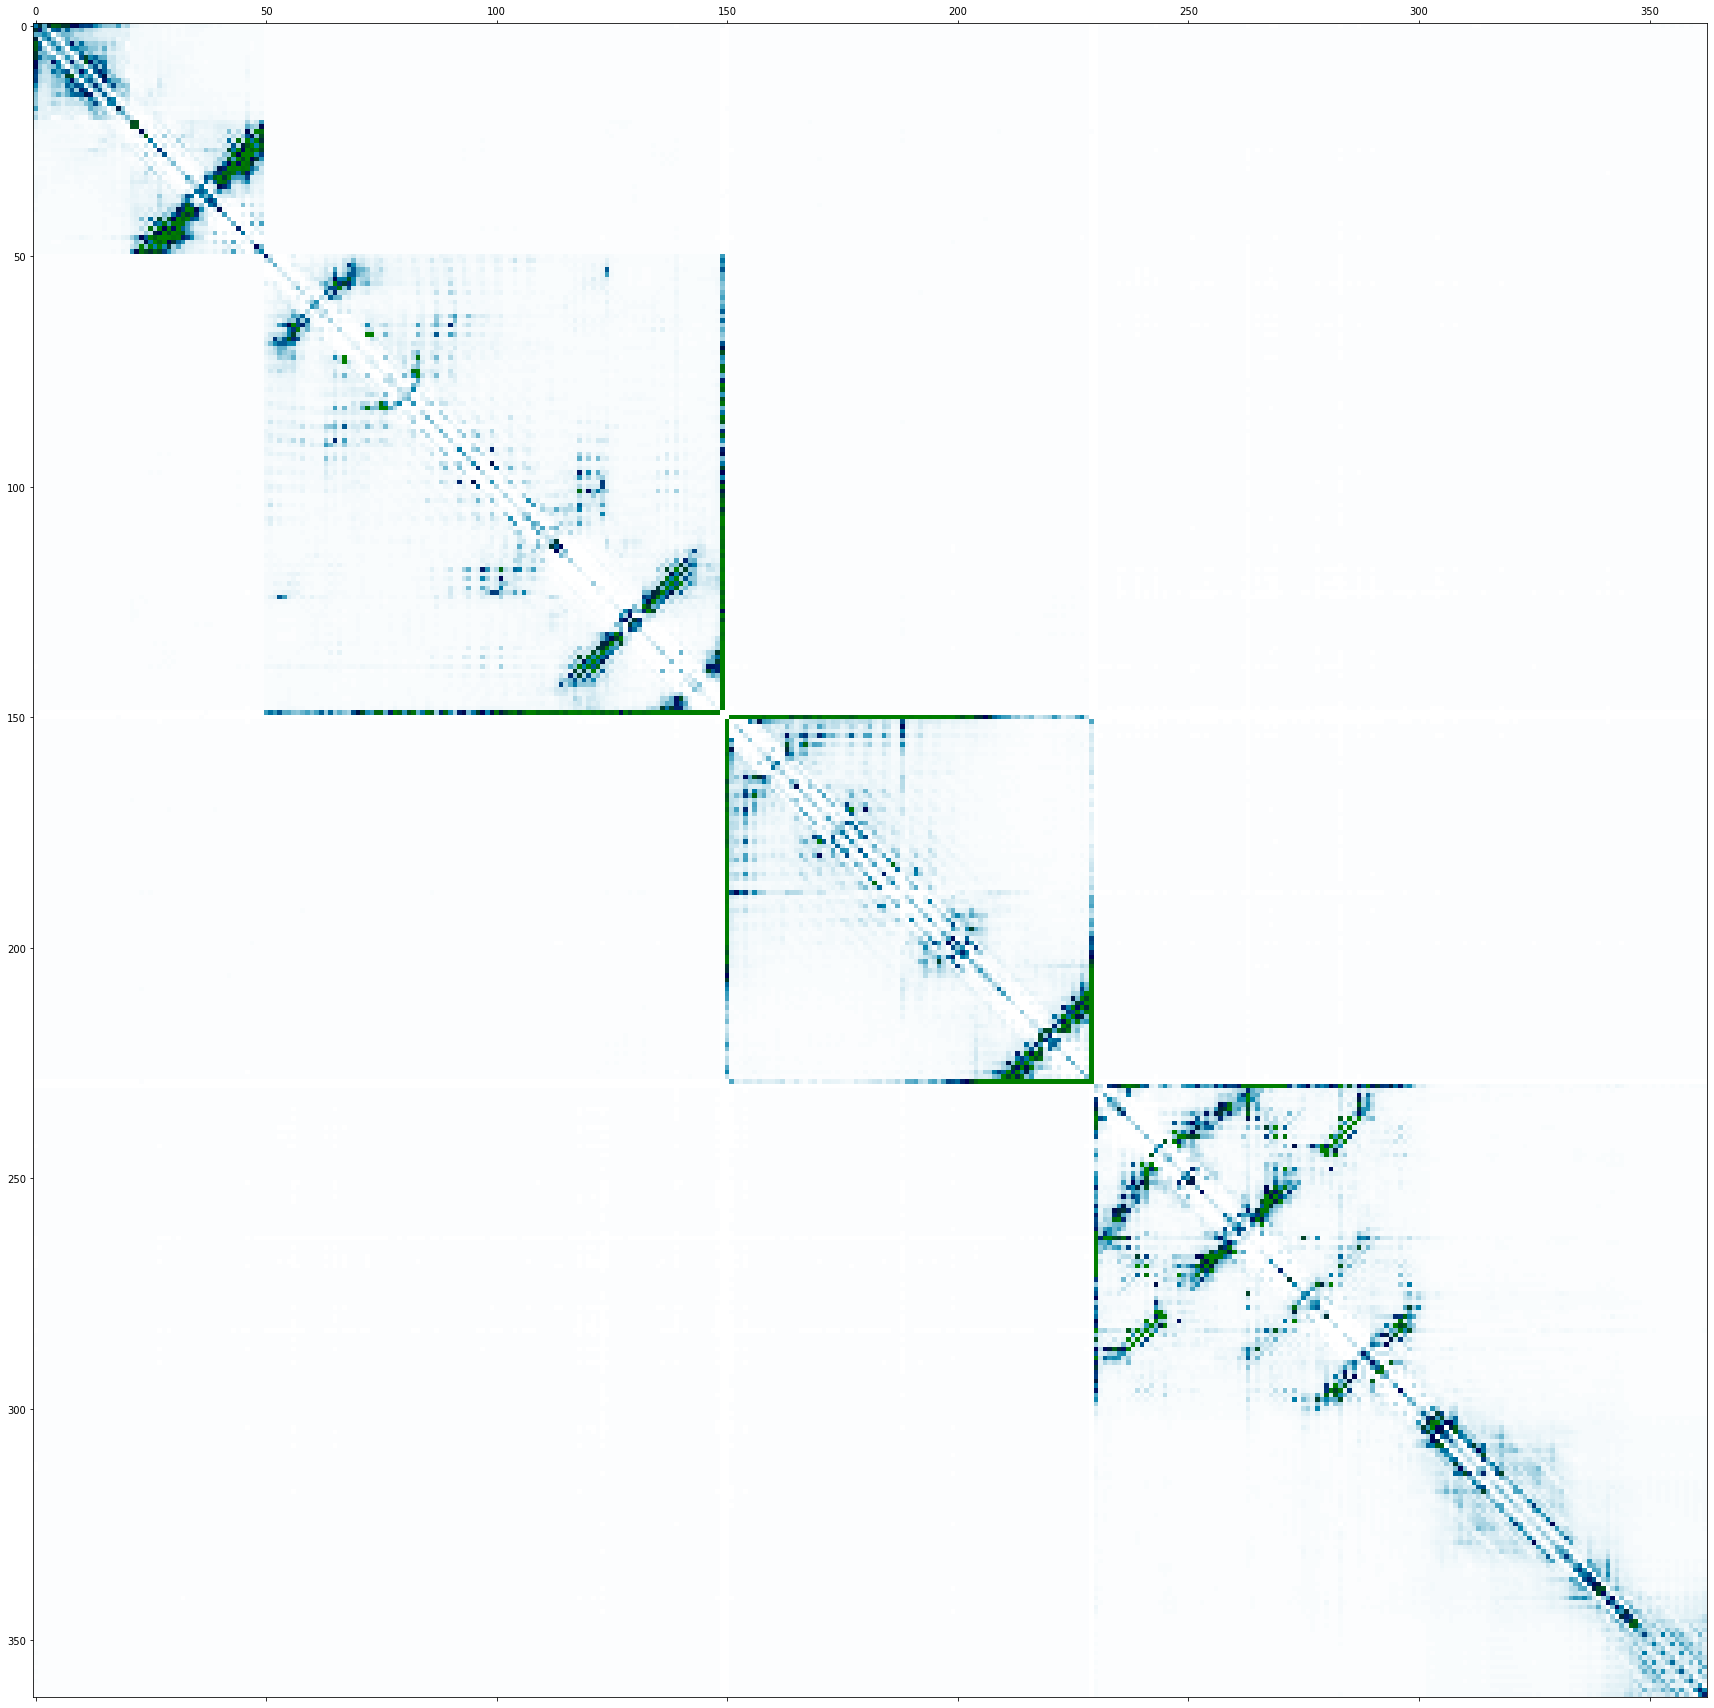

In [8]:
# Multiple gaps
del esm_transformer 
esm_transformer, esm2_alphabet = esm.pretrained.esm2_t33_650M_UR50D()

with torch.no_grad():
    esm2_predictions_gap2 = esm_transformer.predict_contacts(batch_tokens, gap_info_list = [[50, 200],[150, 1000],[230,500]])[0].cpu()

plt.figure(figsize=(30,30))
plt.matshow(esm2_predictions_gap2.numpy(),fignum=1,cmap='ocean_r')
plt.show()

In [11]:
# Compare logits and rep layer

#one protein
seq = 'MEPSLLSLFVLGVVALTETRAGSHSLRYFDTAMSRPELGDSQFISVGYVDDQQFVRFDSSSESPRMEPRAAWMDKVDQEDPNYWEGQTQISRSNAQITRVGLETIRGYYNQSRGGLHTYQTMIGCEVHPDGSFRKGFWQHAYDGHDYIALDRETLTWTAADPGAENTKRKWEAERSIAERYKAYLEEECVQWLKKYLQMGKDVLLRTEPSSARVSRHSGPDGEVSLRCRAQGFYPAEISLTWLRDGEEQLQDTEFIETRPGGDGTFQKWAAVAMAPGQEDRYSCRVQHEALAQPLSLRWEPEASSLWVIVGVTAGVLVLVTAVVAGAVILRRRNSGGKGGAYVPGAA'
seq_tuple = [(1, seq)]
batch_labels, batch_strs, batch_tokens = batch_converter(seq_tuple)

with torch.no_grad():
    outputs = esm_transformer(batch_tokens, gap_info_list = [], repr_layers=[33])
    
seq1_layer = outputs['representations'][33].numpy()
seq1_logits = outputs['logits'].numpy()

#one protein + peptide with gap
seq1 = 'MEPSLLSLFVLGVVALTETRAGSHSLRYFDTAMSRPELGDSQFISVGYVDDQQFVRFDSSSESPRMEPRAAWMDKVDQEDPNYWEGQTQISRSNAQITRVGLETIRGYYNQSRGGLHTYQTMIGCEVHPDGSFRKGFWQHAYDGHDYIALDRETLTWTAADPGAENTKRKWEAERSIAERYKAYLEEECVQWLKKYLQMGKDVLLRTEPSSARVSRHSGPDGEVSLRCRAQGFYPAEISLTWLRDGEEQLQDTEFIETRPGGDGTFQKWAAVAMAPGQEDRYSCRVQHEALAQPLSLRWEPEASSLWVIVGVTAGVLVLVTAVVAGAVILRRRNSGGKGGAYVPGAA'
seq = seq1 + 'GSGSGSGSGSGSGSGS'
seq_tuple = [(1, seq)]
batch_labels, batch_strs, batch_tokens = batch_converter(seq_tuple)

with torch.no_grad():
    outputs = esm_transformer(batch_tokens, gap_info_list = [[len(seq1), 200]], repr_layers=[33])
    
gap_layer = outputs['representations'][33].numpy()
gap_logits = outputs['logits'].numpy()

In [17]:
# Use per position covariation to estimate the inter residue contacts. 200 AA gap

import numpy as np
def do_apc(x, rm=1):
      '''given matrix do apc correction'''
      # trying to remove different number of components
      # rm=0 remove none
      # rm=1 apc
      x = np.copy(x)
      if rm == 0:
        return x
      elif rm == 1:
        a1 = x.sum(0,keepdims=True)
        a2 = x.sum(1,keepdims=True)
        y = x - (a1*a2)/x.sum()
      else:
        # decompose matrix, rm largest(s) eigenvectors
        u,s,v = np.linalg.svd(x)
        y = s[rm:] * u[:,rm:] @ v[rm:,:]
      np.fill_diagonal(y,0)
      return y

def get_contacts(x, symm=True, center=True, rm=1):
  # convert jacobian (L,A,L,A) to contact map (L,L)
  j = x.copy()
  if center:
    for i in range(4): j -= j.mean(i,keepdims=True)
  j_fn = np.sqrt(np.square(j).sum((1,3)))
  np.fill_diagonal(j_fn,0)
  j_fn_corrected = do_apc(j_fn, rm=rm)
  if symm:
    j_fn_corrected = (j_fn_corrected + j_fn_corrected.T)/2
  return j_fn_corrected

def get_categorical_jacobian(seq):
  # ∂in/∂out
  x,ln = batch_converter([("seq",seq)])[-1],len(seq)
  with torch.no_grad():
    f = lambda x: esm_transformer(x,gap_info_list = [[len(seq1), 200]])["logits"][...,1:(ln+1),4:24].cpu().numpy()
    fx = f(x.to(device))[0]
    x = torch.tile(x,[20,1]).to(device)
    fx_h = np.zeros((ln,20,ln,20))
    for n in range(ln): # for each position
      x_h = torch.clone(x)
      x_h[:,n+1] = torch.arange(4,24) # mutate to all 20 aa
      fx_h[n] = f(x_h)
  
  # get contacts
  return get_contacts(fx-fx_h)

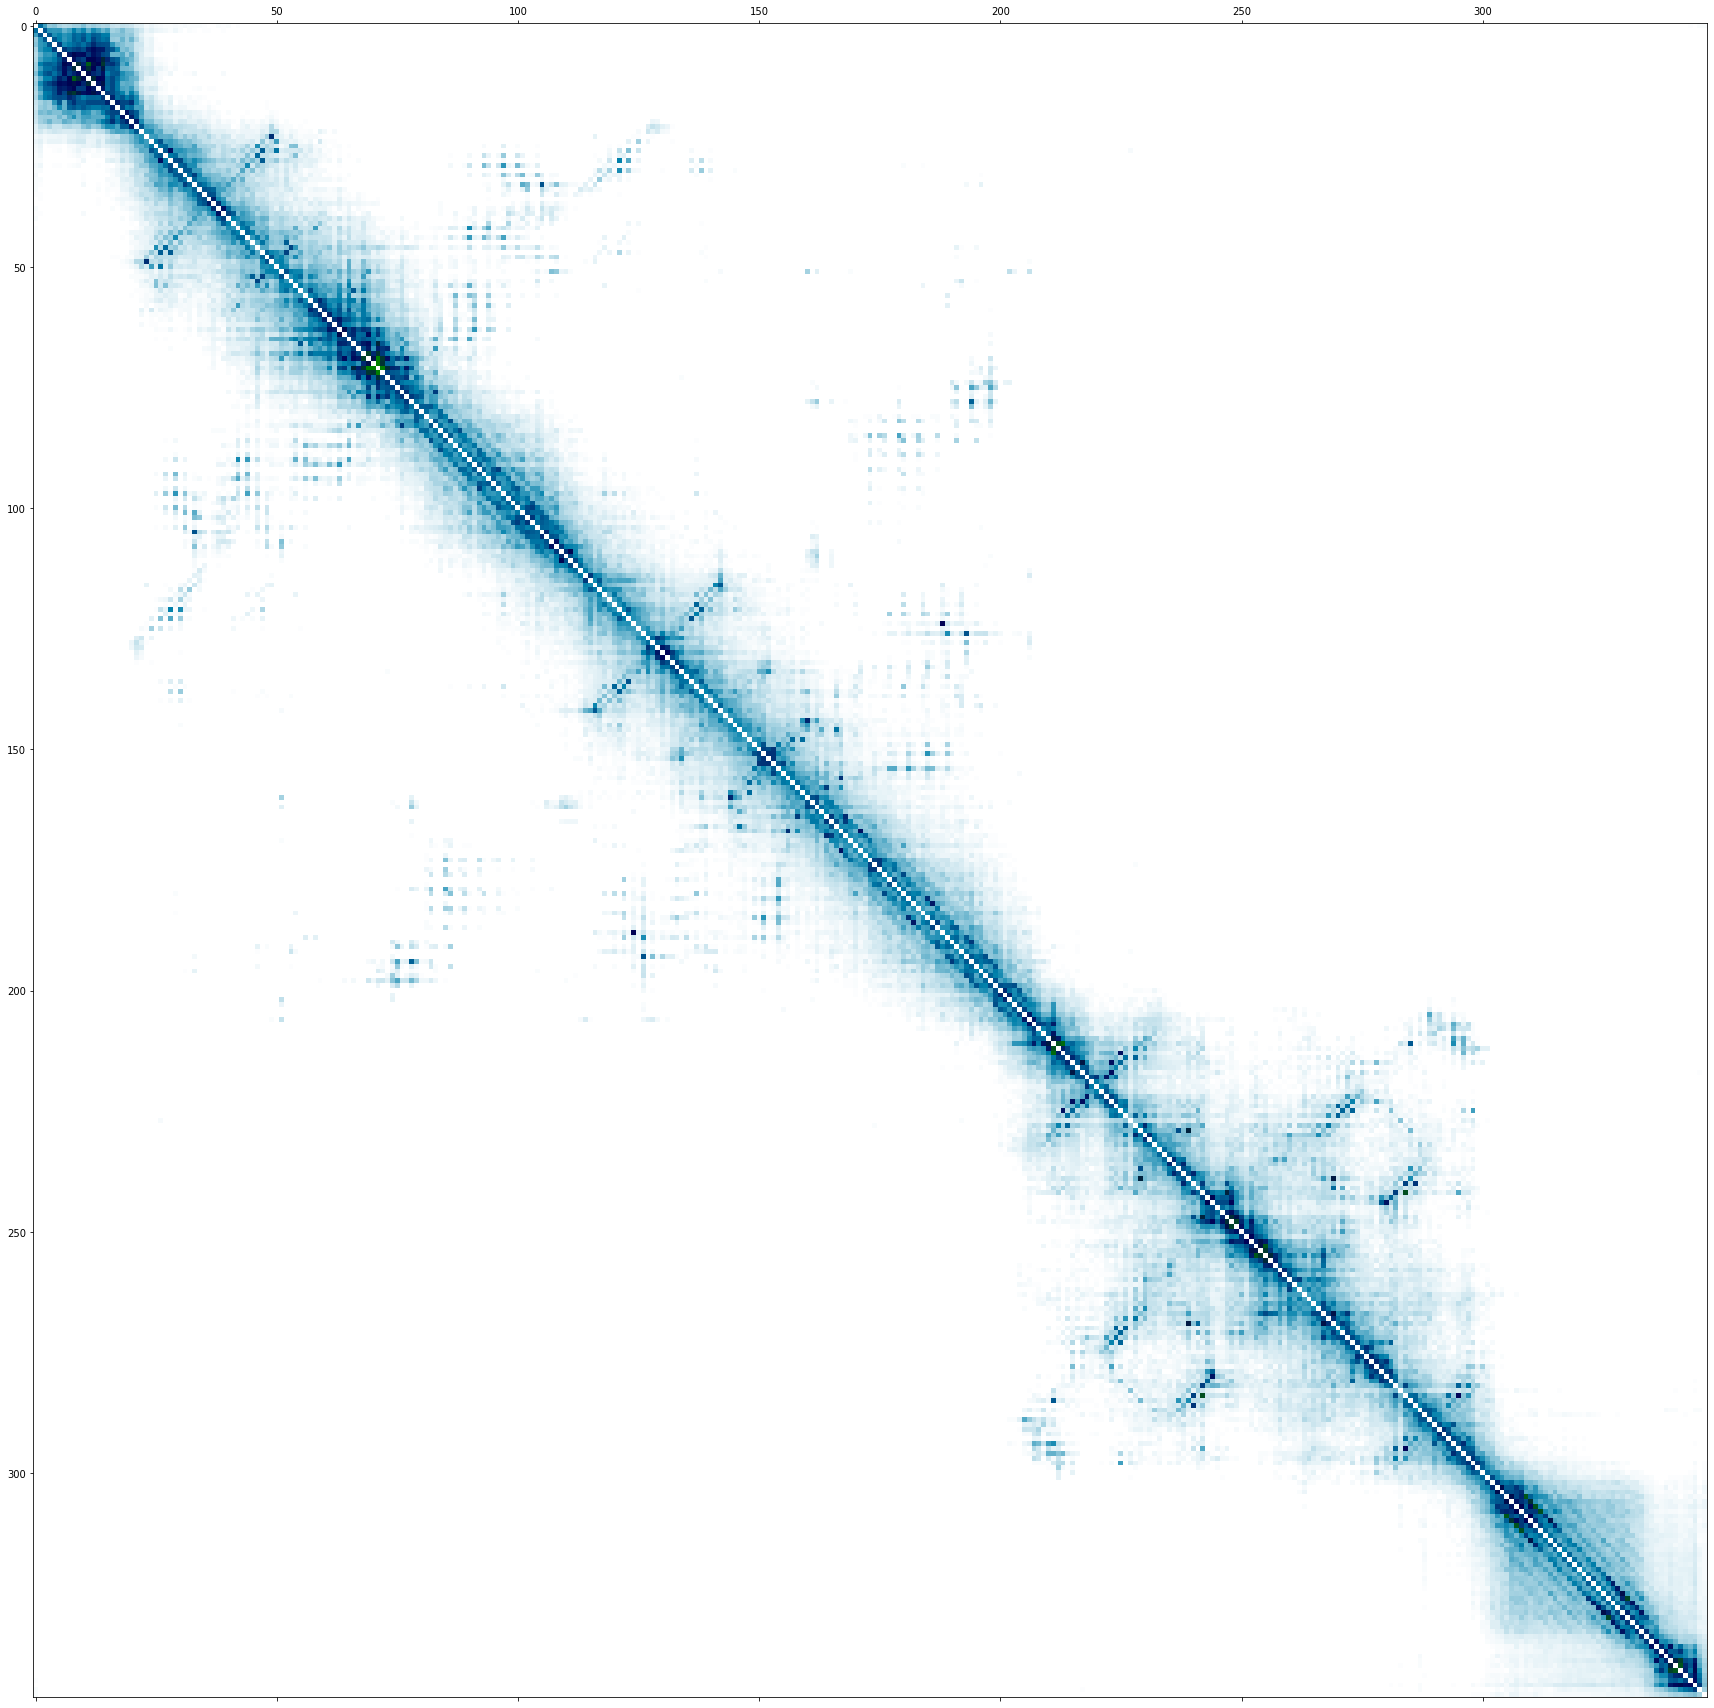

In [23]:
device = 'cpu'
contacts = get_categorical_jacobian(seq)

plt.figure(figsize=(30,30))
plt.matshow(contacts,fignum=1,cmap='ocean_r', vmin=0, vmax=10)
plt.show()